In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import tkinter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('winequality-red.csv', sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# there are no categorical variables. each feature is a number. Regression problem. 
# Given the set of values for features, we have to predict the quality of wine. finding correlation of each feature with our target variable - quality
correlations = df.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


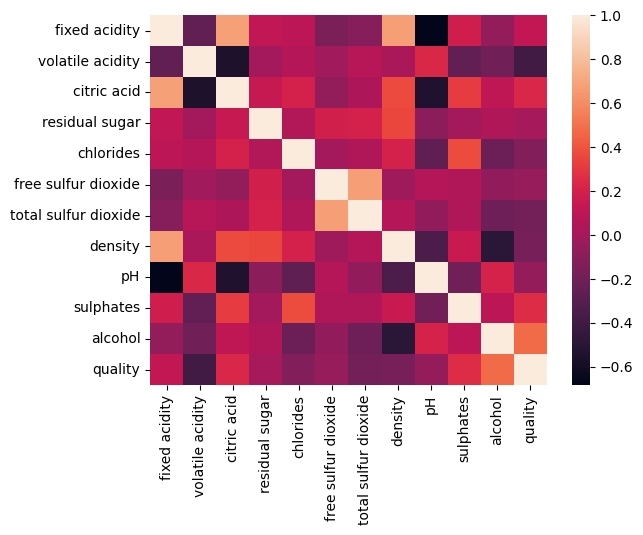

In [4]:
sns.heatmap(df.corr())
plt.show()

In [5]:
def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

In [6]:
# taking features with correlation more than 0.05 as input x and quality as target variable y 
features = get_features(0.05) 
print(features) 
x = df[features] 
y = df['quality']

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [8]:
# fitting linear regression to training data
regressor = LinearRegression()
regressor.fit(x_train,y_train)
  
# this gives the coefficients of the 10 features selected above.  
print(regressor.coef_)

[ 1.80867647e-02 -1.00187836e+00 -1.36155647e-01 -1.80698668e+00
  5.77269406e-03 -3.64711098e-03 -4.58248891e+00 -4.21463758e-01
  8.31155780e-01  2.87698526e-01]


In [9]:
train_pred = regressor.predict(x_train)
print(train_pred)
test_pred = regressor.predict(x_test) 
print(test_pred)

[5.70602706 6.05826889 5.68847627 ... 4.96807424 6.6125683  6.70073458]
[5.34806679 5.05517166 5.66708964 5.47234795 5.72724691 5.28403318
 5.03791776 5.1249201  5.7464113  5.68875405 6.1473241  5.23079222
 5.54879107 5.26184998 5.44792951 6.46589846 5.15102912 5.59145104
 6.55637705 5.32101515 5.38038714 5.19595109 5.94303746 6.35879384
 5.35177061 5.41966382 6.35921825 5.34821308 5.15311857 6.15638261
 5.25353216 5.50782551 5.76135231 5.39324373 5.45778311 5.02455666
 6.16081394 5.68412569 5.65121061 6.16728694 5.53147931 5.24262707
 6.17895973 5.16506044 5.87547952 5.81036214 6.41918012 5.60584147
 5.15466816 5.55353124 5.15006163 5.10868088 5.58261278 6.33518958
 4.95206806 4.98797839 6.00934825 5.39265615 5.83635018 5.25203043
 5.61012632 5.96277273 5.27889339 5.29844861 6.49130825 5.42179306
 6.33931526 5.24973662 6.42060641 5.31516411 6.41686942 4.73860123
 5.79669528 5.83059838 6.17512882 5.29353177 6.76113795 5.90707912
 6.0788683  6.43100596 5.29354692 6.45439032 5.45247947 5

In [10]:
# calculating rmse
train_rmse = mean_squared_error(train_pred, y_train) ** 0.5
print(train_rmse)
test_rmse = mean_squared_error(test_pred, y_test) ** 0.5
print(test_rmse)
# rounding off the predicted values for test set
predicted_data = np.round_(test_pred)
print(predicted_data)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
# displaying coefficients of each feature
coeffecients = pd.DataFrame(regressor.coef_,features)
coeffecients.columns = ['Coeffecient']
print(coeffecients)

0.6513389413206592
0.6251864979819243
[5. 5. 6. 5. 6. 5. 5. 5. 6. 6. 6. 5. 6. 5. 5. 6. 5. 6. 7. 5. 5. 5. 6. 6.
 5. 5. 6. 5. 5. 6. 5. 6. 6. 5. 5. 5. 6. 6. 6. 6. 6. 5. 6. 5. 6. 6. 6. 6.
 5. 6. 5. 5. 6. 6. 5. 5. 6. 5. 6. 5. 6. 6. 5. 5. 6. 5. 6. 5. 6. 5. 6. 5.
 6. 6. 6. 5. 7. 6. 6. 6. 5. 6. 5. 6. 6. 6. 5. 6. 6. 5. 6. 6. 6. 6. 5. 6.
 5. 6. 5. 6. 5. 5. 6. 6. 5. 6. 6. 5. 6. 5. 7. 5. 6. 5. 6. 6. 6. 6. 5. 6.
 6. 5. 6. 5. 5. 5. 6. 6. 6. 6. 6. 5. 5. 6. 6. 5. 5. 5. 5. 6. 6. 6. 6. 5.
 6. 5. 6. 5. 6. 5. 6. 6. 5. 6. 6. 6. 5. 6. 5. 6. 6. 6. 6. 5. 5. 6. 5. 5.
 5. 5. 5. 5. 6. 5. 6. 6. 6. 5. 5. 5. 5. 6. 6. 7. 5. 6. 5. 6. 7. 5. 5. 6.
 6. 7. 6. 5. 5. 5. 6. 6. 5. 6. 5. 5. 7. 6. 5. 6. 6. 6. 6. 5. 6. 7. 6. 6.
 5. 5. 6. 5. 5. 6. 6. 6. 5. 5. 5. 6. 5. 5. 6. 5. 6. 6. 6. 6. 5. 6. 5. 5.
 6. 5. 6. 6. 5. 6. 6. 5. 7. 5. 6. 6. 5. 6. 5. 5. 5. 6. 6. 7. 6. 6. 5. 7.
 6. 6. 5. 5. 6. 6. 5. 6. 5. 5. 5. 6. 6. 6. 6. 5. 6. 5. 5. 5. 5. 6. 5. 6.
 5. 6. 6. 7. 6. 6. 5. 6. 5. 6. 6. 7. 6. 5. 6. 5. 5. 5. 6. 6. 6. 7. 6. 6.
 6. 6. 5. 6. 